In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.optimize import curve_fit
from scipy.special import i0,i1,k0,k1
from scipy.constants import G
from scipy.constants import parsec as pc
import seaborn as sns

In [2]:
msun=1.989e+30
kpc=1e+3*pc
g=4.302e-6

In [3]:
column_names=["Rad","Vobs","errV","Vgas","Vdisk","Vbul","SBdisk","SBbul"]
dir="/home/esha/Documents/anurag/nav/sparc"
df_list=[]
for gal in os.listdir(dir):
    #print(gal)
    if gal.endswith('.csv'):
        file_path=os.path.join(dir,gal)
        #print(file_path)
        df_gal=pd.read_csv(file_path,names=column_names)
        df_gal['Galaxy']=os.path.splitext(gal)[0]
        df_list.append(df_gal)
combined_df=pd.concat(df_list,ignore_index=True)

In [4]:
combined_df.head()

,Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul,Galaxy
0,0.63,262.0,73.6,-0.79,82.82,389.26,1981.83,3538.94,UGC03546
1,0.79,250.0,55.5,-0.85,98.90,366.12,1833.29,1444.35,UGC03546
2,0.95,241.0,42.9,-0.88,113.48,343.54,1695.88,614.37,UGC03546
3,1.11,234.0,31.9,-0.87,126.74,322.48,1568.78,245.76,UGC03546
4,1.27,228.0,28.8,-0.80,138.83,303.96,1451.19,56.22,UGC03546


In [5]:
combined_df.dtypes

Rad       float64
Vobs      float64
errV      float64
Vgas      float64
Vdisk     float64
Vbul      float64
SBdisk    float64
SBbul     float64
Galaxy     object
dtype: object

In [6]:
for column in column_names:
    combined_df[column]=pd.to_numeric(combined_df[column],errors='coerce')

In [7]:
combined_df[combined_df.isna().any(axis=1)]

,Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul,Galaxy


In [8]:
disk_data=combined_df.loc[:,['Rad','Vdisk']]
#disk_data.head()
disk_sort=disk_data.sort_values(by='Rad')
disk_data.head()

,Rad,Vdisk
0,0.63,82.82
1,0.79,98.90
2,0.95,113.48
3,1.11,126.74
4,1.27,138.83


In [9]:
len(combined_df)

2900

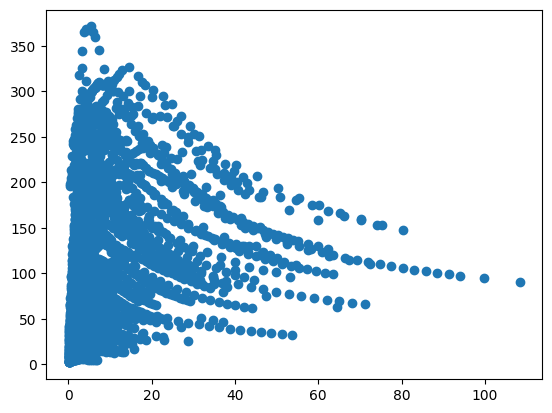

In [10]:
plt.scatter(disk_sort['Rad'],disk_sort['Vdisk'])

Text(0, 0.5, 'Vobs(km/s)')

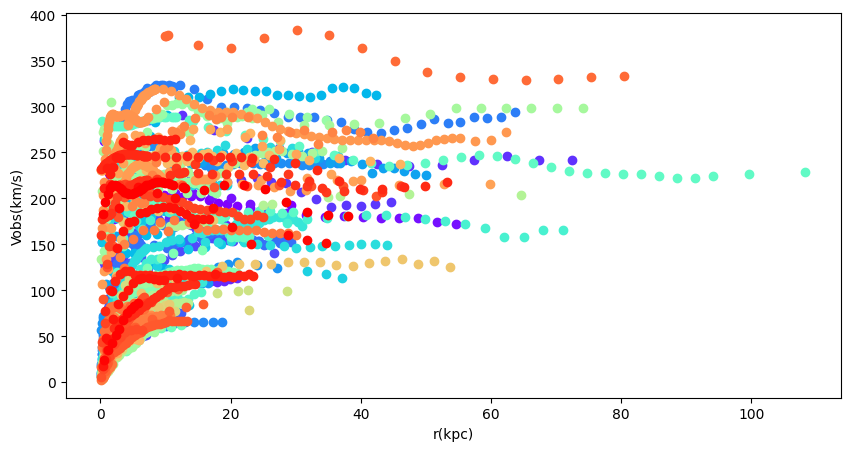

In [11]:
uniq_gal=combined_df['Galaxy'].unique()
colors=plt.cm.rainbow(np.linspace(0,1,len(uniq_gal)))
plt.figure(figsize=(10,5))
for galaxy,color in zip(uniq_gal,colors):
    galaxy_data=combined_df[combined_df['Galaxy']==galaxy]
    plt.scatter(galaxy_data['Rad'],galaxy_data['Vobs'],color=color)
plt.xlabel("r(kpc)")
plt.ylabel("Vobs(km/s)")


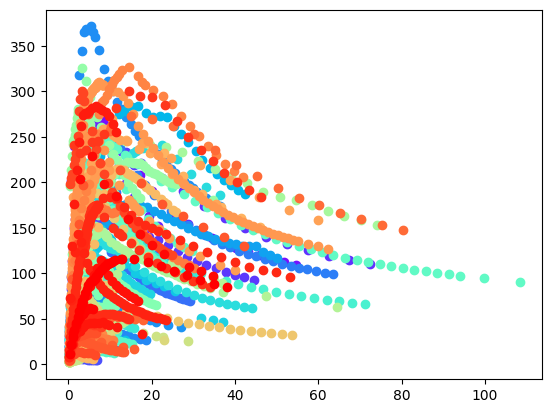

In [12]:
for galaxy,color in zip(uniq_gal,colors):
    galaxy_data=combined_df[combined_df['Galaxy']==galaxy]
    plt.scatter(galaxy_data['Rad'],galaxy_data['Vdisk'],color=color)

In [13]:
def vdisk(r,sigma0,rd):
    const=4*np.pi*G*sigma0*rd
    sec=i0(r/(2*rd))*k0(r/(2*rd))-i1(r/(2*rd))*k1(r/(2*rd))
    temp=1e-3*np.sqrt(np.abs(const*(r/(2*rd))**2*sec))
    return temp

r_d=2.18*kpc
s_0=(10205.4*msun)/(pc**2)
bounds=((0.1*s_0,0.1*r_d),(10*s_0,10*r_d))
popt,pcov=curve_fit(vdisk,combined_df['Rad']*kpc,combined_df['Vdisk'],p0=(0.5*s_0,r_d),bounds=bounds)

popt

In [15]:
r_d=2.18*kpc
s_0=(10205.4*msun)/(pc**2)
bounds=((0.1*s_0,0.1*r_d),(10*s_0,10*r_d))
popt,pcov=curve_fit(vdisk,disk_sort['Rad']*kpc,disk_sort['Vdisk'],p0=(0.5*s_0,r_d),bounds=bounds)

In [16]:
popt

array([2.13188476e+00, 7.52715266e+19])

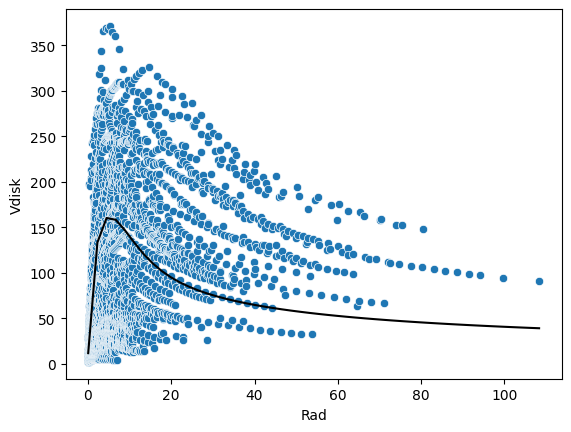

In [17]:
r=np.linspace(combined_df['Rad'].min(),combined_df['Rad'].max())
sns.scatterplot(x='Rad',y='Vdisk',data=disk_sort)
plt.plot(r,vdisk(r*kpc,popt[0],popt[1]),color='black')
plt.savefig('disk.jpg')

r=np.linspace(combined_df['Rad'].min(),combined_df['Rad'].max())
plt.plot(r,vdisk(r*kpc,popt[0],popt[1]),color='green')
for galaxy,color in zip(uniq_gal,colors):
    gal_df=combined_df[combined_df['Galaxy']==galaxy]
    plt.scatter(gal_df['Rad'],gal_df['Vdisk'],color=color)

In [64]:
with open('metadata.txt','r') as file:
    lines=file.readlines()


In [66]:
data=[]
for line in lines:
    field=line.strip().split()
    data.append(field)

In [71]:
len(data[0])

19

In [83]:
uniq_gal

array(['UGC03546', 'NGC3949', 'NGC3953', 'NGC0024', 'NGC7793', 'NGC7331',
       'UGC06930', 'UGC06446', 'UGC07690', 'NGC3769', 'NGC7814',
       'NGC3198', 'UGC07261', 'UGC06983', 'UGC05414', 'NGC2915',
       'NGC3521', 'IC2574', 'NGC3893', 'UGC07866', 'UGC02259', 'UGC02487',
       'F568-V1', 'NGC2683'], dtype=object)

In [87]:
MhI=[]
for num in range(len(data)):
    if data[num][0] in uniq_gal:
        try:
            MhI.append(pd.to_numeric(data[num][13]))
        except ValueError:
            print("could not print")
    #print(data[i][0])

In [99]:
def vgas(r,mh1,rd):
    sigma0=(2*mh1)/(3*np.pi*rd**2)
    c=4*np.pi*G*sigma0*rd
    sec=i0(r/(2*rd))*k0(r/(2*rd))-i1(r/(2*rd))*k1(r/(2*rd))
    vd=1e-6*c*(r/(2*rd))**2*sec
    return vd

In [137]:
MhI[uniq_gal.tolist().index('UGC03546')]

2.491

In [146]:
rh=45.12*kpc
def fit_galaxy(df, gal_name, rd_initial, rh):
    gal_data = df[df['Galaxy'] == gal_name]
    r = gal_data['Rad'].values
    vg = gal_data['Vgas'].values
    mh = MhI[uniq_gal.tolist().index(gal_name)]*msun
    
    # Define the model to fit
    def model(r, rd):
        return vgas(r, mh, rd)
    
    # Initial guess and bounds
    initial_guess = [2 * rh]
    bounds = ([0.1 * rh], [10 * rh])
    
    # Curve fitting
    popt, pcov = curve_fit(model, r * kpc, vg**2, p0=initial_guess, bounds=bounds)
    
    return popt, np.sqrt(np.diag(pcov))


In [149]:
rd_values = {}
for gal in uniq_gal:
    rd_opt, rd_err = fit_galaxy(combined_df, gal, 2 * rh, rh)
    rd_values[gal] = (rd_opt, rd_err)
    print(f"{gal}: rd = {rd_opt[0]/kpc:.2f} ± {rd_err[0]:.2f}")

UGC03546: rd = 90.24 ± 0.00
NGC3949: rd = 90.24 ± 0.00
NGC3953: rd = 90.24 ± 1845209865324300700359376498589696.00
NGC0024: rd = 90.24 ± 0.00
NGC7793: rd = 90.24 ± 0.00
NGC7331: rd = 90.24 ± 0.00
UGC06930: rd = 90.24 ± 6013757409337832992942306835300352.00
UGC06446: rd = 4.51 ± 9857774218897230214014697472.00
UGC07690: rd = 90.24 ± 0.00
NGC3769: rd = 90.24 ± 0.00
NGC7814: rd = 4.51 ± 7843499988729816002110423040.00
NGC3198: rd = 4.51 ± 5949568101761914290416123904.00
UGC07261: rd = 90.24 ± 0.00
UGC06983: rd = 90.24 ± 5232781606636096166929217890549760.00
UGC05414: rd = 90.24 ± 0.00
NGC2915: rd = 90.24 ± 0.00
NGC3521: rd = 90.24 ± 0.00
IC2574: rd = 90.24 ± 21718978406011092810990508664946688.00
NGC3893: rd = 90.24 ± 0.00
UGC07866: rd = 90.24 ± 0.00
UGC02259: rd = 90.24 ± 0.00
UGC02487: rd = 90.24 ± 0.00
F568-V1: rd = 90.24 ± 12199621867120509688758225787158528.00
NGC2683: rd = 90.24 ± 0.00


In [150]:
def vbulge(r,lrh,a):
    rh0=np.power(10,lrh)
    vs=2*np.pi*G*rh0*a*r/(1+r/a)**2
    vbg=1e-3*np.sqrt(vs)
    return vbg

In [152]:
bounds=([-21,0],[-14,50*kpc])
popt,pcov=curve_fit(vbulge,combined_df['Vbul'],combined_df['Rad']*kpc,maxfev=2000,p0=(-20.0,10*kpc),bounds=bounds)

In [153]:
popt

array([-2.00000000e+01,  3.08567758e+20])

In [160]:
rho_0=np.power(10,popt[0])*1.477e28#bulge
def vbulge2(r,a):
    rh0=rho_0
    vs=2*np.pi*g1*rh0*a*r/(1+r/a)**2
    vbg=np.sqrt(vs)
    return vbg

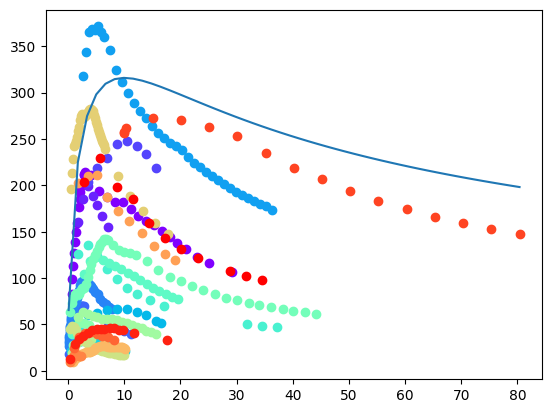

In [164]:
a1=popt[1]*3.24e-20
plt.plot(r,vbulge2(r,a1))
for galaxy,color in zip(uniq_gal,colors):
    gal_df=combined_df[combined_df['Galaxy']==galaxy]
    plt.scatter(gal_df['Rad'],gal_df['Vdisk'],color=color)